# Analysis of Diamond dataset with Pandas

By Olga Kriyokov

This data set we’ll contains prices and other attributes of nearly 54,000 diamonds. 

in this analysis we will be answering the next questions:
1. What proportion of diamonds are between .30 and 1.08 carats?
2. How many of the diamonds have equal x and y dimensions?
3. How many of the diamonds have a carat less than the mean carat value?
4. How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are
   ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal
5. Which diamond has the highest price per carat? What is its value?
6. Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within
   the data set?
7. Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance
   of the boxplots.
8. Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can
   draw from the shape of the resulting distributions.
9. Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading Data

filename = (r"C:\Users\Olga Kriyokov\Documents\GitHub\DAV-54000/diamonds.csv")
df=pd.read_csv(filename)
print(df)

#df=pd.read_csv("diamonds.csv", error_bad_lines=False)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6       0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7       0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8       0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9       0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
10      0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
11      0.23      Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46

In [3]:
#Shape of data
df.shape

(53940, 10)

This data set contain more than 53000 rows with attributes: 
* price in US dollars (\$326--\$18,823)
* weight of the diamond (0.2--5.01)
* quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* diamond colour, from J (worst) to D (best)
* Clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x - length in mm (0--10.74)
* y - width in mm (0--58.9)
* z - depth in mm (0--31.8)
* depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* width - width of top of diamond relative to widest point (43--95)

# 1. What proportion of diamonds are between .30 and 1.08 carats?

In [4]:
cond=(df['carat']>=.30) & (df['carat']<=1.08)
total_in_range=cond.sum()
total_rows=cond.shape[0]
proportion=total_in_range/float(total_rows)
print("Proportion of diamonds in given range: ",round(proportion,2))


Proportion of diamonds in given range:  0.75


In this question, we were asked about the ratio of diamonds with the above attributes. As you can see, 75% of the diamonds have those attributes. In order to answer this question, I summed up all values that has those values and devided by total number of rows. Also, I have included border values 0.30 and 1.08 carats.
The answer was rounded with 2 numbers after the dot. 

# 2. How many of the diamonds have equal x and y dimensions?

In [17]:
tempdf=df.loc[:,['x','y']].nunique(axis=1)
tempdf=df[tempdf==1]
equal_x_y=tempdf.shape[0]
print("Total Diamonds with equal x and y dimensions: ",equal_x_y)

print(tempdf.query)

Total Diamonds with equal x and y dimensions:  17
<bound method DataFrame.query of        carat        cut color clarity  depth  table  price     x     y     z
3397    0.30      Ideal     H    VVS2   62.5   54.0    567  4.30  4.30  2.70
10055   0.27  Very Good     F    VVS1   62.0   55.0    591  4.16  4.16  2.59
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.00
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.00
16516   1.00    Premium     E     VS2   60.0   60.0   6600  6.43  6.43  3.89
16851   1.00    Premium     E     VS2   60.0   60.0   6720  6.43  6.43  3.89
17368   1.22    Premium     G     SI2   62.4   61.0   6969  6.79  6.79  4.23
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.00
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.00  0.00  0.00
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00  0.00
34302   0.32      Ideal     D    VVS2   62.1   54.0    858  4.40  4.40

To answer this question, I found all rows that has the same values of X and Y. Using nunique function, I will count distinct observations over the axis

# 3. How many of the diamonds have a carat less than the mean carat value?

In [7]:
mean_carat=df['carat'].mean()
cond=df['carat']<mean_carat
diamonds_lessthan=cond.sum()
print("Total Diamonds with with Carat less than mean: ",diamonds_lessthan)

Total Diamonds with with Carat less than mean:  31127


First I calculated the mean value of the carats. Then I checked and summed all rows taht has carat value which is lower than the mean value

# 4. How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows:
Fair / Good / Very Good / Premium / Ideal

In [18]:
cond=(df['cut']=='Premium') | (df['cut']=='Ideal')
prem_or_higher=cond.sum()
print("Total Diamonds with Premium or better: ",prem_or_higher)

Total Diamonds with Premium or better:  35342


First,I checked witch rows has diamond cut = Ideal or to premium, and then summed them

# 5. Which diamond has the highest price per carat? What is its value?

In [23]:
tempdf=df['price']/df['carat']
index=tempdf.idxmax()
print(df.loc[index])
print('*'*40)
print("Price per carat of it is ",tempdf[index])

carat           1.04
cut        Very Good
color              D
clarity           IF
depth           61.3
table             56
price          18542
x               6.53
y               6.55
z               4.01
Name: 27635, dtype: object
****************************************
Price per carat of it is  17828.8461538


In order to fine the diamond that has the highest price oer value, we defined a new parameter, tempdf. This parameter will store all values of price divided by carat. Then, i used idxmax function that returns the index of first occurrence of a maximum.
I also printed the row index so it will be easier to look for this row. 

# 6. Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within the data set?

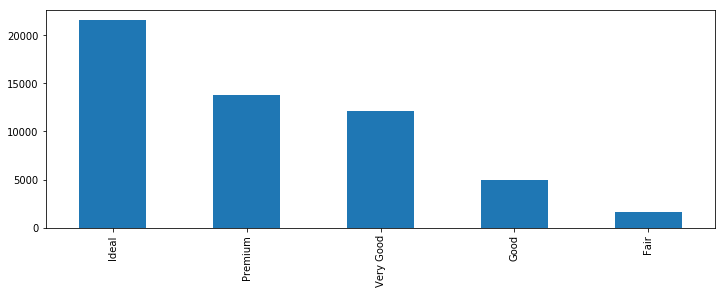

In [10]:
df['cut'].value_counts().plot(kind='bar',figsize=(12,4))
plt.show()

By creating this bar chart, I counted all occurrences that has those specific cut values.From this chart, we can easily conclude that there are more than a 20000 diamonds with ideal cut. Then we have Premium cut with around 15000 diamonds and so on. The least diamonds we have are of Fair cut.

# 7. Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots.

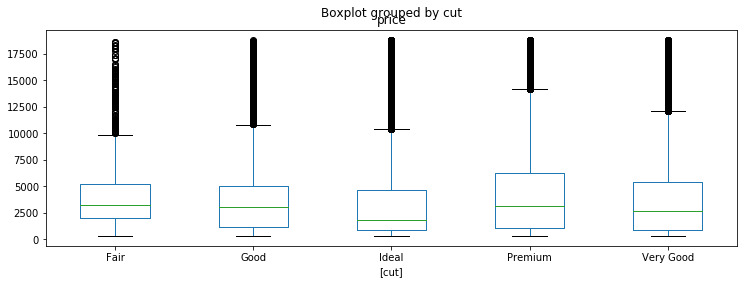

In [26]:
tempdf=df.loc[:,['cut','price']]
tempdf.boxplot(by='cut',grid=False,figsize=(12,4))
plt.show()

By creating this box plot you will be able to destinguish different diamond cuts and their prices. You can see that Premium cut diamonds have slightly higher prices as compared to others, and ideal have prices slighly lower. By looking at the whisker, we will be able to understand how are data is spreads. For example, by lookinat the Fair cut, the lowest point in the sample which is the price is above zero, while the highest point is near $10,000. The box starts in a point of a little bit lower than $2500, and the median is around $3,000.

# 8. Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions.

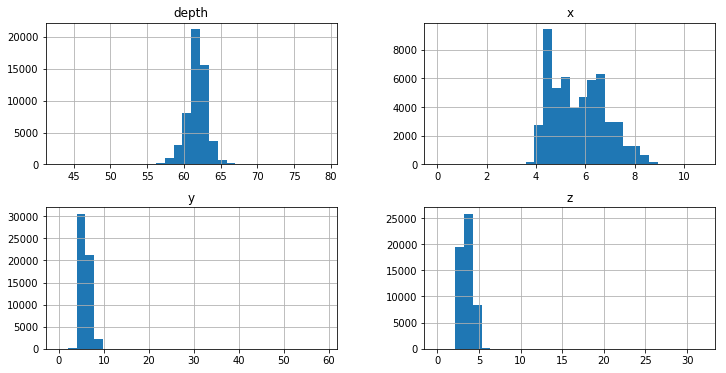

In [31]:
tempdf=df.loc[:,['x','y','z','depth']]
tempdf.hist(bins=30,figsize=(12,6))
plt.show()

By looking at the upper left histogram , you can see  the total depth of diamond which is between 55-65 and it looks like normal distribution. x values are spread between 4-8 and has multiple peaks where the highest one is on 8000 and some peaks around 5000. Looking at Y histogram, you can see that the y values are between 0-10, and have a peak of 30000 values. The Z histogram, shows us that the values are between 2-6 and has a peak of more that 25000 diamonds that have range of Y values that are between 3.5-4.5. 

# 9. Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

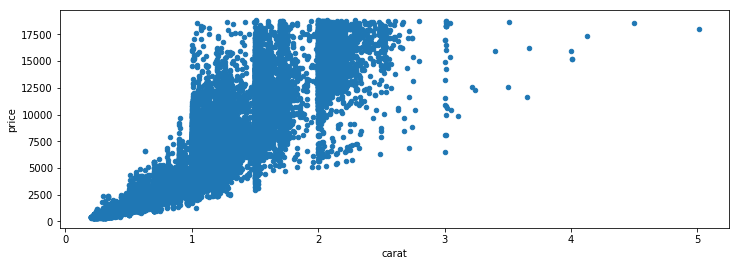

In [14]:
tempdf=df.loc[:,['carat','price']]
tempdf.plot(kind='scatter',x='carat',y='price',figsize=(12,4))
plt.show()

In this scatter plot, you will be able to see the correlation between price and carats. Price represented on Y axis and carats represented on X axis. You can see thet there is a strong positive relationship between carat and price. The more the carat value the customer wants,  the more the price is. You also can find few exceptional values that are spread out in the plot. Foe example, there is a diamond that has 5 carats and also has an exeptional proce of more than $17500